# S08 T01: Tasca Feature Engineering

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import scipy.stats
from scipy.stats import norm
from scipy import stats
from scipy.stats import t
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from numpy.polynomial.polynomial import polyfit
from sklearn.decomposition import PCA
import matplotlib.cm as cm

## Exercici 1. Agafa un conjunt de dades de tema esportiu que t'agradi i normalitza els atributs categòrics en dummy. Estandaritza els atributs numèrics amb StandardScaler.

De l'Sprint07, carreguem les dades netes, sense nuls, amb l'històric de jugadors de la selecció espanyola de futbol absolut masculina que han debutat (obtingudes a partir de la web bdfutbol.com). Recordem els noms de les columnes:

Sobrenom; Nom; Data Naixement; Lloc de Naixament; Província; País; Partits Jugats; Partits Titular; Partits Complets; Partits Suplent; Partits Substituït; Partits Convocats (sense jugar); Partits Guanyats; Partits Empetats; Partits Perduts; Minuts; Goles; Gols Penalt; Goles pròpia porta; Gols Encaixats; Targetes grogues; Targetes vermelles; Edat inicial; Edat final; Alçada; Pes

In [2]:
jugadors = pd.read_csv('C:\\Users\\Silvia\\Desktop\\rubenIT\\DataSources\\jugadores00.csv')#importem i li assignem un nom de dataframe

In [3]:
#Imprimim les dades filtrades per comprovar la importació
print(jugadors.describe())
print(jugadors.head(10))
print(jugadors.tail(10))

               PJ          PT          PC          PS          PX          PG  \
count  654.000000  654.000000  654.000000  654.000000  654.000000  654.000000   
mean    14.155963   11.085627    8.006116    3.070336    3.056575    8.391437   
std     22.460518   19.330256   14.271486    5.229901    7.115855   15.330149   
min      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    1.000000    1.000000    0.000000    0.000000    1.000000   
50%      5.000000    4.000000    3.000000    1.000000    1.000000    3.000000   
75%     16.000000   12.000000    9.000000    3.000000    3.000000    9.000000   
max    180.000000  161.000000  125.000000   42.000000   59.000000  131.000000   

               PE          PP           Min           G          GP  \
count  654.000000  654.000000    654.000000  654.000000  654.000000   
mean     3.333333    2.431193   1005.507645    1.960245    0.142202   
std      4.831199    3.607972   1669.924268    5.165109  

### Normalització atributs categòrics en dummy

Els atributs categòrics que podem observar serien "Ciudad", "Provincia" i "País". Descartem "Ciudad" perquè sortirien moltes columnes; acotem l'estudi a "Provincia" i a "País", que com comprovarem sortiran 52 columnes i 15 respectivament. Les afegim a un nou dataframe que anomenarem jugadors00.

In [4]:
dummy_prov=pd.get_dummies(jugadors["Provincia"])
print(dummy_prov.info())
print(dummy_prov.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   A Coruña                654 non-null    uint8
 1   Albacete                654 non-null    uint8
 2   Alicante                654 non-null    uint8
 3   Almería                 654 non-null    uint8
 4   Araba/Álava             654 non-null    uint8
 5   Asturias                654 non-null    uint8
 6   Badajoz                 654 non-null    uint8
 7   Barcelona               654 non-null    uint8
 8   Bizkaia                 654 non-null    uint8
 9   Burgos                  654 non-null    uint8
 10  Cantabria               654 non-null    uint8
 11  Castellón               654 non-null    uint8
 12  Ceuta                   654 non-null    uint8
 13  Ciudad Real             654 non-null    uint8
 14  Cáceres                 654 non-null    uint8
 15  Cádiz                  

In [5]:
dummy_pais=pd.get_dummies(jugadors["País"])
print(dummy_pais.head())
print(dummy_pais.info())

   Alemania  Argentina  Brasil  Dinamarca  España  Francia  Guinea Ecuatorial  \
0         0          0       0          0       1        0                  0   
1         0          0       0          0       1        0                  0   
2         0          0       0          0       1        0                  0   
3         0          0       0          0       1        0                  0   
4         0          0       0          0       1        0                  0   

   Guinea-Bisáu  Hungría  Italia  Marruecos  Mauritania  Paraguay  Suiza  \
0             0        0       0          0           0         0      0   
1             0        0       0          0           0         0      0   
2             0        0       0          0           0         0      0   
3             0        0       0          0           0         0      0   
4             0        0       0          0           0         0      0   

   Uruguay  
0        0  
1        0  
2        0  
3   

Unim els dos resultats dummies amb el dataframe original, i obtenim un nou dataframe de 92 columnes.

In [6]:
jugadors00=jugadors.merge(dummy_prov,left_index=True,right_index=True)
jugadors00=jugadors00.merge(dummy_pais,left_index=True,right_index=True)

In [7]:
print(jugadors00.head())

          Apodo                       Nombre       Fecha    Ciudad  Provincia  \
0  Marcos Vales         Marcos Vales Illanes  05/04/1975  A Coruña   A Coruña   
1         Acuña              Juan Acuña Naya  13/02/1923  A Coruña   A Coruña   
2        Martín  José María Martín Rodríguez  25/04/1924  A Coruña   A Coruña   
3       Casilla     Francisco Casilla Cortés  02/10/1986   Alcover  Tarragona   
4  Juan Sánchez    Juan Ginés Sánchez Romero  15/05/1972    Aldaia   Valencia   

     País  PJ  PT  PC  PS  ...  Francia  Guinea Ecuatorial  Guinea-Bisáu  \
0  España   1   0   0   1  ...        0                  0             0   
1  España   1   0   0   1  ...        0                  0             0   
2  España   1   1   1   0  ...        0                  0             0   
3  España   1   0   0   1  ...        0                  0             0   
4  España   1   0   0   1  ...        0                  0             0   

   Hungría  Italia  Marruecos  Mauritania  Paraguay  Sui

### Estandarització dels atributs numèrics amb StandardScaler

Apliquem la estandarització dels atributs "Altura" i "Peso".

*The most common method of scaling is standardization, in this method we center the data, then we divide by the standard devation to enforce that the standard deviation of the variable is one*

Trobem la metodologia a:
https://medium.com/@stallonejacob/data-science-scaling-of-data-in-python-ec7ad220b339

**Si fem el càlcul amb els dos atributs junts:**

In [8]:
ss=StandardScaler()
Xstd=ss.fit_transform(jugadors00[["Altura","Peso"]].values)
print(Xstd[1:20])

[[ 0.23352816  2.46695505]
 [-0.26503794  0.01473049]
 [ 2.39398125  1.59116056]
 [-0.76360404 -0.33558731]
 [-0.92979274 -1.03622289]
 [-0.76360404 -0.5107462 ]
 [-0.43122664 -0.6859051 ]
 [-0.59741534  0.01473049]
 [ 2.22779255  0.71536608]
 [ 1.39684905  1.06568387]
 [-0.92979274 -0.33558731]
 [ 1.39684905  1.06568387]
 [ 0.23352816  0.01473049]
 [-0.09884924 -0.6859051 ]
 [-0.76360404 -0.5107462 ]
 [ 1.23066035  1.76631946]
 [-0.09884924  0.18988939]
 [-0.59741534 -0.33558731]
 [ 0.06733946  0.36504828]]


Extraiem les columnes del Array generat, i comparem els valors de les noves mitjanes amb les mitjanes abans de la transformació.

In [9]:
#Extracció per columnes del Array generat
Altura_transformed = Xstd[:, 0]
Peso_transformed = Xstd[:, 1]
print("Mitjana Altura transformada = " + str(np.mean(Altura_transformed)))
print("Mitjana Peso transformada = " + str(np.mean(Peso_transformed)))
print("Mitjana Altura abans transformació = " + str(jugadors00.Altura.mean()))
print("Mitjana Peso abans transformació = " + str(jugadors00.Peso.mean()))

Mitjana Altura transformada = -2.178345848928136e-15
Mitjana Peso transformada = -3.1507246692726155e-16
Mitjana Altura abans transformació = 177.5948012232416
Mitjana Peso abans transformació = 73.91590214067278


Comprovem que la nova desviació estàndar és 1, i la comprovem amb les originals.

In [10]:
print("Variació Altura transformada = " + str(np.var(Altura_transformed)))
print("Variació Peso transformada = " + str(np.var(Peso_transformed)))
print("Variació Altura abans transformació = " + str(jugadors00.Altura.std()))
print("Variació Peso abans transformació = " + str(jugadors00.Peso.std()))

Variació Altura transformada = 1.0000000000000004
Variació Peso transformada = 1.0
Variació Altura abans transformació = 6.02186194821565
Variació Peso abans transformació = 5.713471710423933


In [11]:
print("Mitjana: " + str(Xstd.mean()))
print("Desviació estàndard: " + str(Xstd.std()))

Mitjana: -1.2467091579276987e-15
Desviació estàndard: 1.0


**Podem interpretar aquests valors amb una regressió lineal per als partits jugats i tots dos atributs junts.**

In [12]:
#Per partits jugats "PJ"
lr=LinearRegression()
lr.fit(Xstd,jugadors00.PJ.values)
print("Intercept (independent term): " + str(lr.intercept_))
print("Coefficient: " + str(lr.coef_))

Intercept (independent term): 14.1559633027523
Coefficient: [2.25662005 0.14921409]


Interpretació del Coeficient:
- *For 1 standard deviation increase in height estimates 2.26 matches played*
- *For 1 standard deviation increase in weight estimates 0.15 matches played*

Posem els valors X i Y transformats ("Altura" i "Peso") en un gràfic, i els comparem amb els orginals.

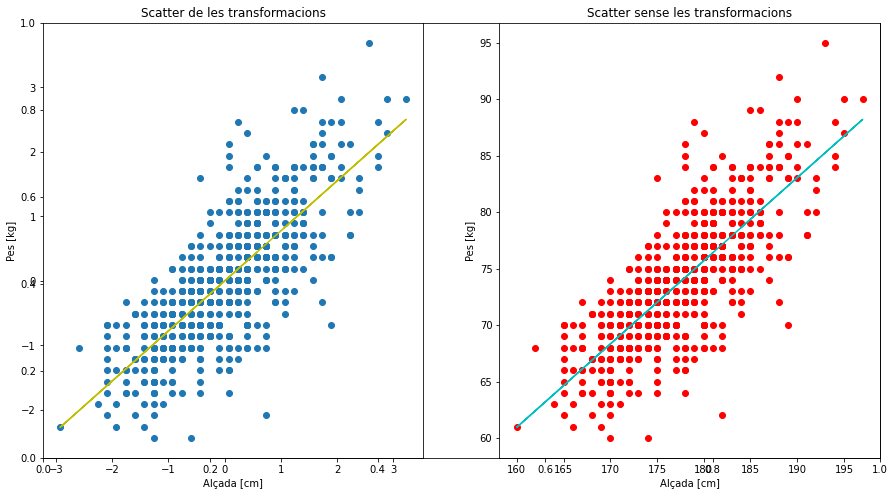

In [13]:
fig, ax1 = plt.subplots(figsize = (15, 8))
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(Altura_transformed,Peso_transformed)
#Afegim regressió lineal y = b + mx
b_t,m_t=polyfit(Altura_transformed,Peso_transformed,1)
ax1.plot(Altura_transformed,b_t+m_t*Altura_transformed,"y-")
plt.title("Scatter de les transformacions",fontsize=12)
plt.xlabel("Alçada [cm]")
plt.ylabel("Pes [kg]")


ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(jugadors00.Altura,jugadors00.Peso, color="r")
#Afegim regressió lineal y = b + mx. Convertim les columnes del DF en Arrays.
x00=jugadors00.Altura.to_numpy()
y00=jugadors00.Peso.to_numpy()
b,m=polyfit(x00,y00,1)
ax2.plot(x00,b+m*x00,"c-")
plt.title("Scatter sense les transformacions",fontsize=12)
plt.xlabel("Alçada [cm]")
plt.ylabel("Pes [kg]")


plt.show()

Veiem que la distribució dels punts és la mateixa. El que hem fet quan estandaritzem i normalitzem és reescalar les dades.

També veiem que hi ha una clara dependència lineal entre pes i alçada dels jugadors, la qual quantificarem aplicant l'estimació PCA de la biblioteca sklearn.

Observem els components i la variança explicada.

## Exercici 2. Continua amb el conjunt de dades de tema esportiu que t'agradi i aplica l'anàlisi de components principals. (PCA Principal Component Analysis)

### Podríem analitzar només els dos atributs "Altura" i "Peso".

De la següent web, extraiem una funció que ens permet vectoritzar els punts. S'extreu la conclusió que a més alçada, més pes, de forma generalitzada.

https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector.

These vectors represent the principal axes of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the "principal components" of the data.

In [14]:
pca = PCA(n_components=2)
pca.fit(Xstd)

PCA(n_components=2)

In [15]:
print(pca.components_)

[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


In [16]:
print(pca.explained_variance_)

[1.77909258 0.22397021]


In [17]:
print(pca.explained_variance_ratio_)

[0.88818612 0.11181388]


In [18]:
print(pca.singular_values_)

[34.08441655 12.09349199]


De la següent web, extraiem una funció que ens permet vectoritzar els punts. S'extreu la conclusió que a més alçada, més pes, de forma generalitzada.

https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

*To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector.*

*These vectors represent the principal axes of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the "principal components" of the data.*

Text(0, 0.5, 'Pes')

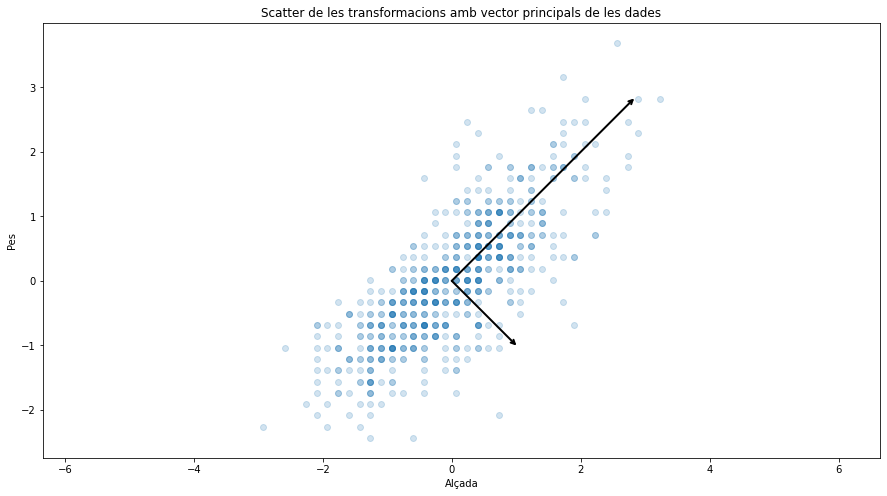

In [19]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.figure(figsize=(15,8))
plt.scatter(Xstd[:, 0], Xstd[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis("equal")
plt.title("Scatter de les transformacions amb vector principals de les dades",fontsize=12)
plt.xlabel("Alçada")
plt.ylabel("Pes")

### Tanmateix, analitzem més atributs del Dataframe jugadors

Primer hem d'escollir només les columnes numèriques. Com que hi ha moltes columnes perquè hem afegit els dummies, tornarem al DF original "jugadors", i escollirem algunes columnes.

Informació de guia per a l'elaboració d'aquesta tasca:
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [20]:
jugadors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Apodo      654 non-null    object 
 1   Nombre     654 non-null    object 
 2   Fecha      654 non-null    object 
 3   Ciudad     654 non-null    object 
 4   Provincia  654 non-null    object 
 5   País       654 non-null    object 
 6   PJ         654 non-null    int64  
 7   PT         654 non-null    int64  
 8   PC         654 non-null    int64  
 9   PS         654 non-null    int64  
 10  PX         654 non-null    int64  
 11  PG         654 non-null    int64  
 12  PE         654 non-null    int64  
 13  PP         654 non-null    int64  
 14  Min        654 non-null    int64  
 15  G          654 non-null    int64  
 16  GP         654 non-null    int64  
 17  GPP        654 non-null    int64  
 18  GE         654 non-null    int64  
 19  TA         654 non-null    int64  
 20  TR        

**Estandaritzem diverses columnes**

In [21]:
features = [6,7,11,12,13,14,23,24]
# Separating out the features
x02 = jugadors.iloc[:,features].values
# Standardizing the features
x03 = StandardScaler().fit_transform(x02)

In [22]:
print(x03)

[[-0.58618563 -0.57392471 -0.48251943 ... -0.60198927  0.56590556
   0.54020718]
 [-0.58618563 -0.57392471 -0.48251943 ... -0.59299996  0.23352816
   2.46695505]
 [-0.58618563 -0.52215275 -0.48251943 ... -0.54865265 -0.26503794
   0.01473049]
 ...
 [ 5.29529194  5.01744776  5.98028637 ...  5.01693405 -1.26217014
  -1.03622289]
 [ 6.81021798  7.39895826  7.35118457 ...  7.37093691  0.73209425
   1.06568387]
 [ 7.38945441  7.76136203  8.00399323 ...  7.61304923  1.06447165
   1.59116056]]


**Projecció PCA a 2D:** de 8 columnes o dimensions, passarem a 2D. Afegirem a l'anàlisi un attribut o feature categòric al final del nou dataframe.

In [24]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x03)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ["component01", "component02"])

In [25]:
finalDf = pd.concat([principalDf, jugadors[["País"]]], axis = 1)
print(finalDf)

     component01  component02    País
0      -1.402271     0.900828  España
1      -1.313171     2.023128  España
2      -1.434904    -0.057450  España
3      -1.156180     2.909495  España
4      -1.469516    -0.655229  España
..           ...          ...     ...
649    11.093777    -2.354243  España
650    12.485555     0.608710  España
651    11.157751    -2.421696  España
652    15.825330     0.075897  España
653    16.927616     0.590114  España

[654 rows x 3 columns]


**Visualitzem les dades**

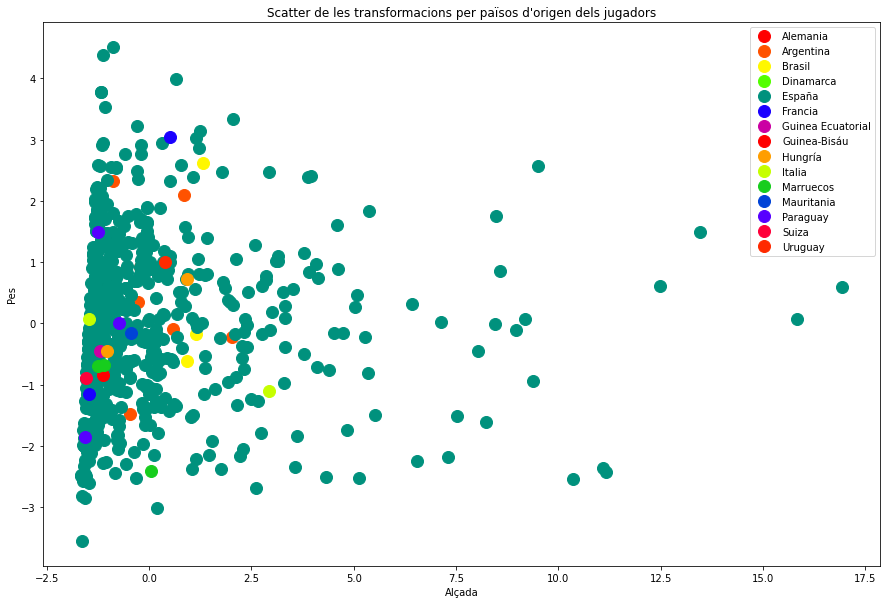

In [26]:
groups = finalDf.groupby("País")


fig, ax1 = plt.subplots(figsize = (15, 10))
ax1.margins(0.05)

#Afegim diferents colors per a cada punt
colors = iter(cm.prism(np.linspace(0, 1, 70)))

for name, group in groups:
    ax1.plot(group.component01, group.component02, marker='o', linestyle='', ms=12, label=name,color=next(colors))
ax1.legend()
plt.title("Scatter de les transformacions per països d'origen dels jugadors",fontsize=12)
plt.xlabel("Alçada")
plt.ylabel("Pes")
plt.show()

**Explained Variance**

*The explained variance tells you how much information (variance) can be attributed to each of the principal components.*

En passar de 8 a 2 dimensions, hem perdut variança, també anomenada informació. Amb la variança explicada

In [27]:
pca.explained_variance_ratio_

array([0.69329212, 0.21942958])

Amb l'atribut *explained_variance_ratio_*, veiem que el primer component té una variança de 69,4% i el segon component de 21,94%. En total, els dos components sumen un 91.34% de la informació.

## Exercici 3. Continua amb el conjunt de dades de tema esportiu que t'agradi i normalitza les dades tenint en compte els outliers.

Una forma senzilla de veure els outliers és mitjançant una caixa boxplot. Grafiquem "Altura", i veiem que els outliers estan per sobre de 194 cm i per sota de 163 cm.

Podem considerar el següent pels outliers:
- Eliminar les dades fora de la distribució normal.
- Per sobre dels límits, assignar el valor màxim (mitjana + 2 sgimas).
- No realitzar canvis.

En el nostre cas, eliminem els outliers i normalitzem.

(150.0, 200.0)

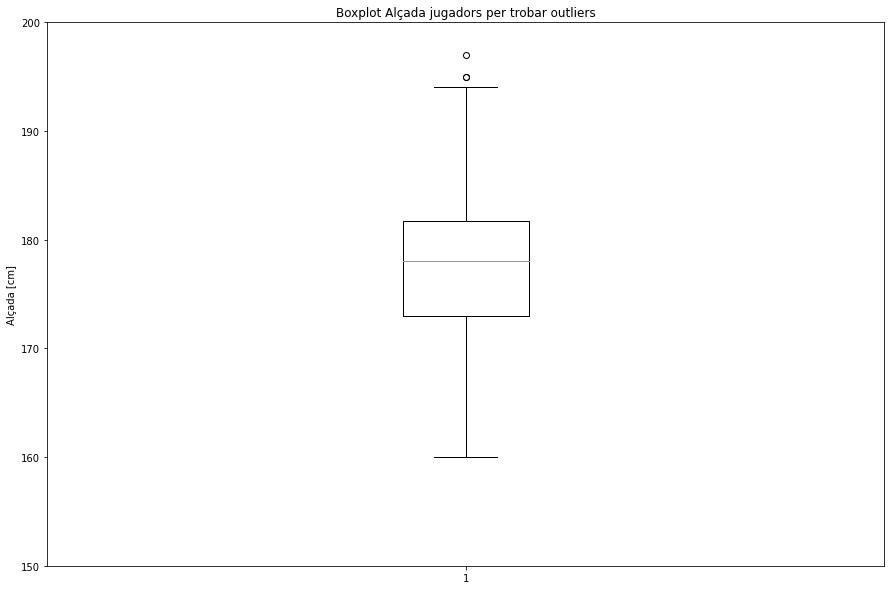

In [41]:
fig, ax = plt.subplots(figsize = (15, 10))
ax.boxplot(jugadors.Altura)
plt.title("Boxplot Alçada jugadors per trobar outliers",fontsize=12)
plt.ylabel("Alçada [cm]")
plt.ylim(150,200)

Quantitat de Outliers detectats = 8


(150.0, 200.0)

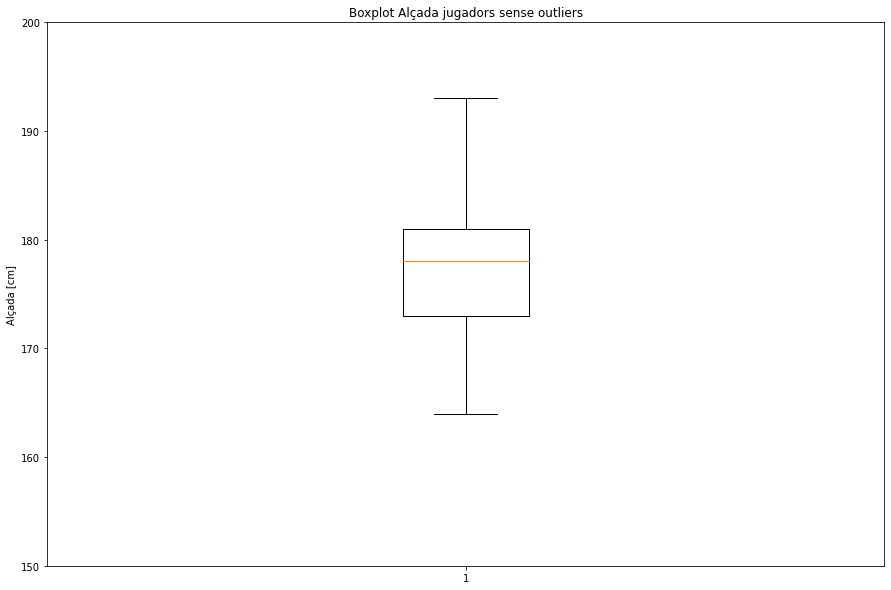

In [51]:
Outliers=jugadors[(jugadors.Altura<194) & (jugadors.Altura>163)]
print("Quantitat de Outliers detectats = " + str(jugadors.Altura.count()-Outliers.Altura.count()))
jugadors01=jugadors[(jugadors.Altura<194) & (jugadors.Altura>163)]
fig, ax = plt.subplots(figsize = (15, 10))
ax.boxplot(jugadors01.Altura)
plt.title("Boxplot Alçada jugadors sense outliers",fontsize=12)
plt.ylabel("Alçada [cm]")
plt.ylim(150,200)

**Normalització**
Un cop eliminats els outliers, fem la normalització de les dades. Aplicarem la normalització min-max.

In [61]:
jugadors02 = jugadors01.Altura

#Creem la funció
def minmax_norm(df_input):
    return (jugadors02 - jugadors02.min()) / ( jugadors02.max() - jugadors02.min())

jugadors02_minmax_norm = minmax_norm(jugadors02)

print(jugadors02_minmax_norm)
print(jugadors02_minmax_norm.describe())

0      0.586207
1      0.517241
2      0.413793
3      0.965517
4      0.310345
         ...   
649    0.241379
650    0.862069
651    0.206897
652    0.620690
653    0.689655
Name: Altura, Length: 646, dtype: float64
count    646.000000
mean       0.465037
std        0.198295
min        0.000000
25%        0.310345
50%        0.482759
75%        0.586207
max        1.000000
Name: Altura, dtype: float64


Es pot veure com la normalització ha funcionat, i tots els valors d'"Altura" estan compressos entre 0 i 1. Fem un dibuix per comprendre-ho visualment.

Text(0, 0.5, 'Alçada')

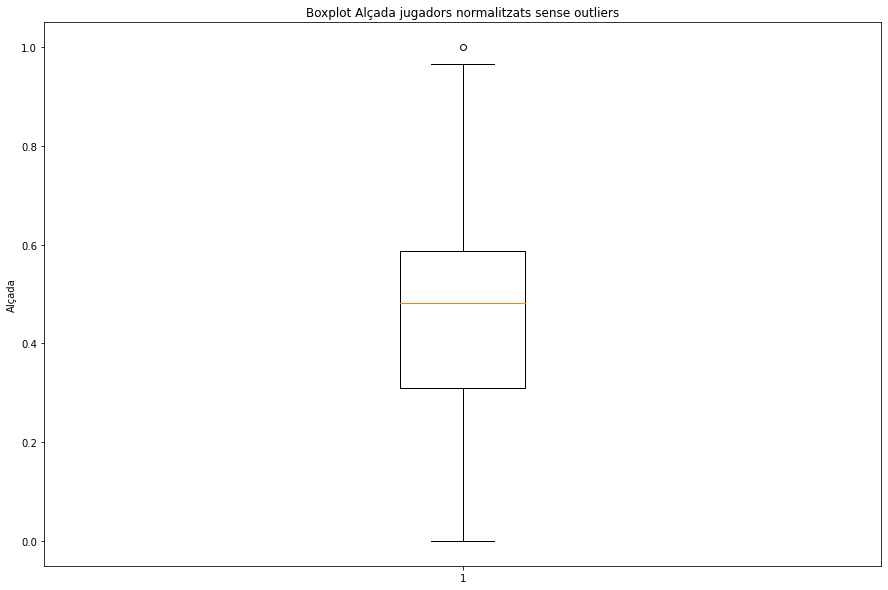

In [65]:
fig, ax = plt.subplots(figsize = (15, 10))
ax.boxplot(jugadors02_minmax_norm)
plt.title("Boxplot Alçada jugadors sense outliers i després normalitzats",fontsize=12)
plt.ylabel("Alçada")